<a href="https://colab.research.google.com/github/hsudhakaran/test_jax/blob/main/siglip_mytest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
# from tensorflow.keras.datasets import mnist
from flax import linen as nn
from flax import nnx
import matplotlib.pyplot as plt
%matplotlib inline
import pdb
import optax
import copy
import torch
import pdb
import math
from torch.nn import functional as F
import copy
from PIL import Image
import requests
from typing import Optional, Sequence, Union

In [2]:
from transformers import AutoProcessor, SiglipVisionModel, SiglipVisionConfig, SiglipModel

processor = AutoProcessor.from_pretrained("google/siglip-base-patch16-224")
# vision_model = SiglipVisionModel.from_pretrained("google/siglip-base-patch16-224", config=SiglipVisionConfig(vision_use_head=False))
vision_model = SiglipModel.from_pretrained("google/siglip-base-patch16-224")

vision_model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

SiglipModel(
  (text_model): SiglipTextTransformer(
    (embeddings): SiglipTextEmbeddings(
      (token_embedding): Embedding(32000, 768)
      (position_embedding): Embedding(64, 768)
    )
    (encoder): SiglipEncoder(
      (layers): ModuleList(
        (0-11): 12 x SiglipEncoderLayer(
          (self_attn): SiglipSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): SiglipMLP(
            (activation_fn): PytorchGELUTanh()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768

In [27]:
for k, v in vision_model.state_dict().items():
    print(k)
    # if "vision_model.embeddings." in k:
    #     print(v.shape)

logit_scale
logit_bias
text_model.embeddings.token_embedding.weight
text_model.embeddings.position_embedding.weight
text_model.encoder.layers.0.self_attn.k_proj.weight
text_model.encoder.layers.0.self_attn.k_proj.bias
text_model.encoder.layers.0.self_attn.v_proj.weight
text_model.encoder.layers.0.self_attn.v_proj.bias
text_model.encoder.layers.0.self_attn.q_proj.weight
text_model.encoder.layers.0.self_attn.q_proj.bias
text_model.encoder.layers.0.self_attn.out_proj.weight
text_model.encoder.layers.0.self_attn.out_proj.bias
text_model.encoder.layers.0.layer_norm1.weight
text_model.encoder.layers.0.layer_norm1.bias
text_model.encoder.layers.0.mlp.fc1.weight
text_model.encoder.layers.0.mlp.fc1.bias
text_model.encoder.layers.0.mlp.fc2.weight
text_model.encoder.layers.0.mlp.fc2.bias
text_model.encoder.layers.0.layer_norm2.weight
text_model.encoder.layers.0.layer_norm2.bias
text_model.encoder.layers.1.self_attn.k_proj.weight
text_model.encoder.layers.1.self_attn.k_proj.bias
text_model.encoder

In [3]:
!curl -L 'https://www.ncaa.org/images/2021/7/22/MBA_Ball.JPG?width=1884&quality=80&format=jpg' --output image.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   280  100   280    0     0    777      0 --:--:-- --:--:-- --:--:--   777
100  222k  100  222k    0     0   246k      0 --:--:-- --:--:-- --:--:-- 8254k


{'input_ids': tensor([[ 291,  269,  262,  266, 1304,  267,  262,  266, 6722,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1],
        [ 291,  269,  262,  266, 1304,  267,  454, 3014,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1]]), 'pixel_values': tensor([[[[ 0.6863,  0.6627,  0.6784,  ...,  0.6784,  0.6784,  0.6549],
          [ 0.6941

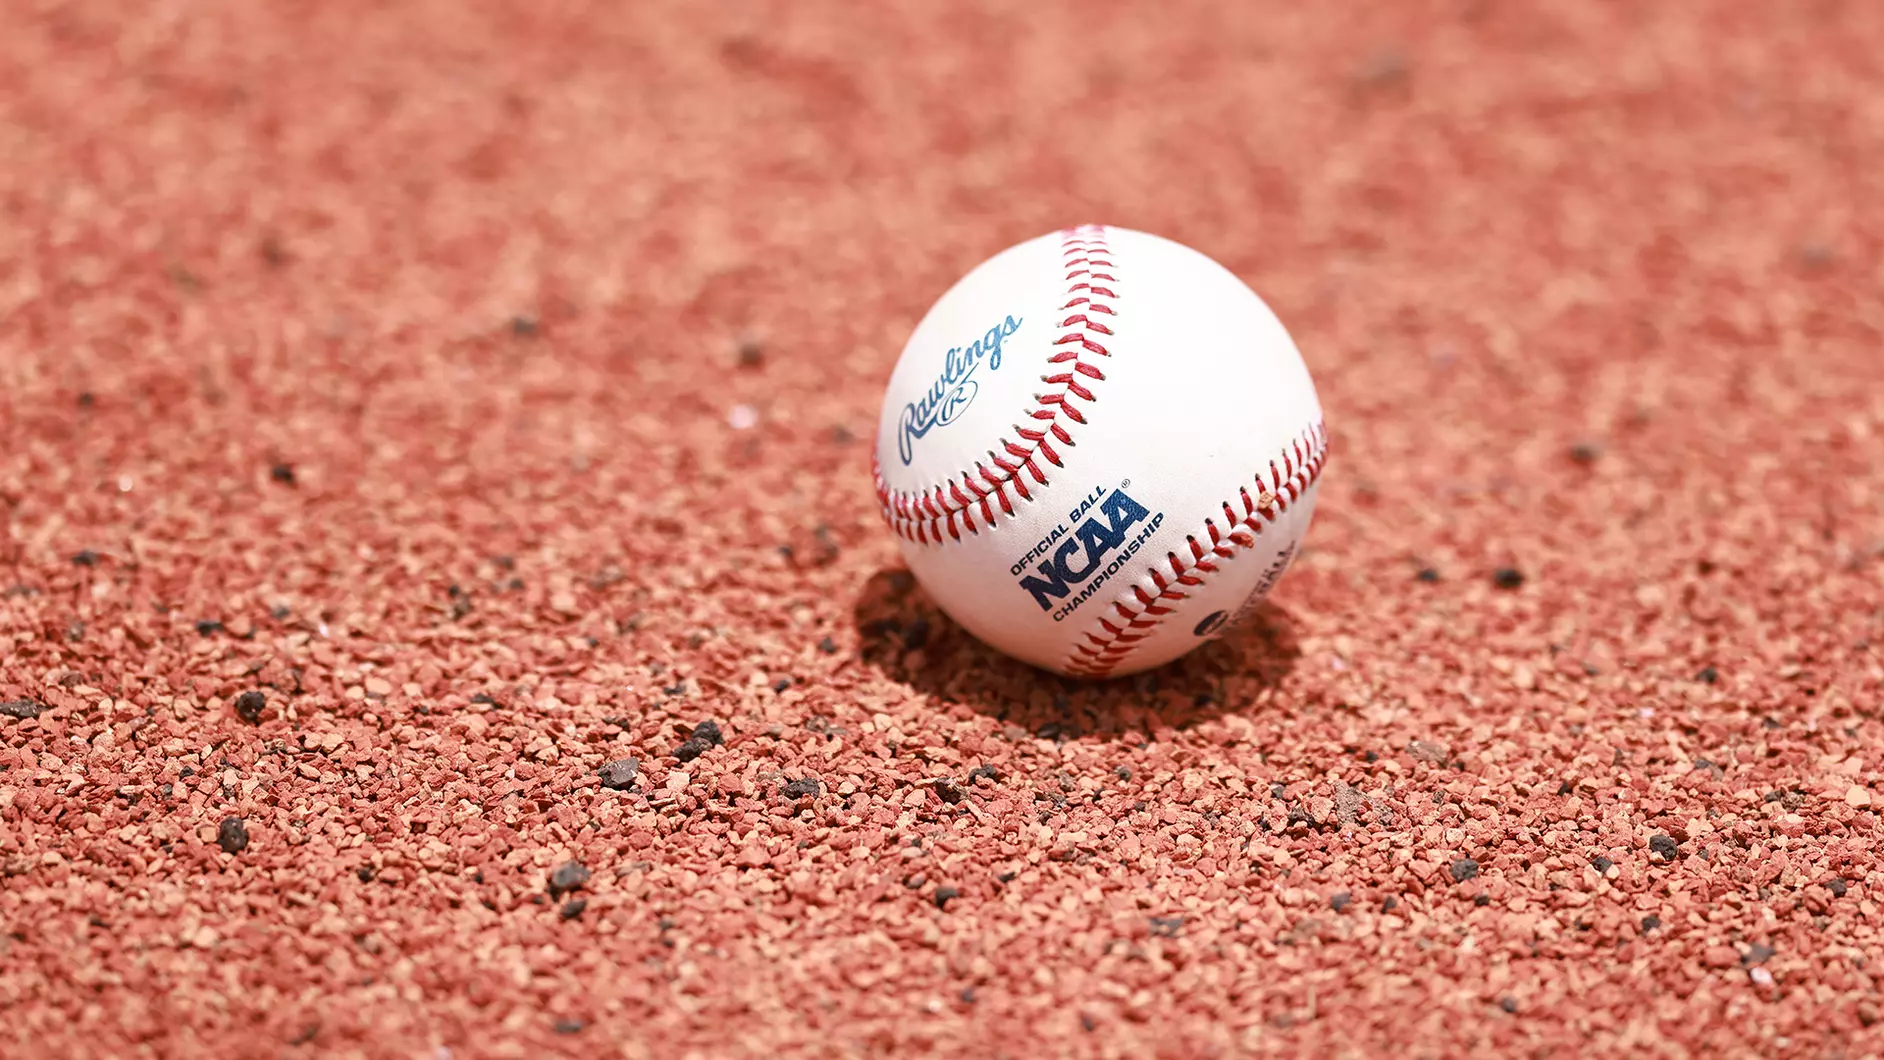

In [4]:
# url = "http://i.imgur.com/8o9DXSj.jpeg"
image = Image.open("image.jpg")

candidate_labels = ["a baseball", "2 dogs"]
# follows the pipeline prompt template to get same results
texts = [f'This is a photo of {label}.' for label in candidate_labels]
# important: we pass `padding=max_length` since the model was trained with this
inputs = processor(text=texts, images=image, padding="max_length", return_tensors="pt")
print(inputs)
image

In [ ]:
with torch.no_grad():
    outputs = vision_model(**inputs)

logits_per_image = outputs.logits_per_image
probs = torch.sigmoid(logits_per_image) # these are the probabilities
print(f"{probs[0][0]:.1%} that image 0 is '{candidate_labels[0]}'")

77.1% that image 0 is 'a baseball'


In [ ]:
vision_model.vision_model.head.probe.shape

torch.Size([1, 1, 768])

In [ ]:
print(outputs[0])
(outputs.text_embeds[0]@outputs.image_embeds.T)/0.07, (outputs.text_embeds[1]@outputs.image_embeds.T)/0.07

tensor([[  1.2163, -17.4503]])


(tensor([1.7227]), tensor([-0.5501]))

In [ ]:
key = jax.random.PRNGKey(42)
xtr = jax.random.normal(key, (1,224,224, 3))

In [ ]:
class SiglipVisionEmbeddingsFlax(nn.Module):
    """Siglip Embeddings Network"""

    num_channels: int = 3
    embed_dim: int = 768
    image_size: int = 224
    patch_size: int = 16

    def setup(self):


        self.patch_embedding = nn.Conv(
          features=self.embed_dim,
          kernel_size=(self.patch_size, self.patch_size),
          strides=(self.patch_size, self.patch_size),
          padding="VALID",
        )

        self.num_patches = (self.image_size // self.patch_size) ** 2
        self.num_positions = self.num_patches
        self.position_embedding =nn.Embed(num_embeddings=self.num_positions,
                                          features=self.embed_dim)

        self.position_ids = jnp.arange(self.num_positions)[None, :]

    def __call__(self, inputs):

        patch_embeds = self.patch_embedding(inputs)
        embeddings = patch_embeds.reshape(patch_embeds.shape[0], self.num_patches, self.embed_dim)  # (B, num_patches, embed_dim)
        pos_embeds = self.position_embedding(self.position_ids)
        embeddings = embeddings + pos_embeds
        return embeddings

In [ ]:
flax_model = SiglipVisionEmbeddingsFlax()
params = flax_model.init(jax.random.PRNGKey(45),xtr)

In [ ]:
from typing import Dict, Any, List
leaves, treedef = jax.tree_util.tree_flatten(params)
print(treedef)
for paramz in leaves:
    print(paramz.shape)

PyTreeDef({'params': {'patch_embedding': {'bias': *, 'kernel': *}, 'position_embedding': {'embedding': *}}})
(768,)
(16, 16, 3, 768)
(196, 768)


In [ ]:
# class SiglipVisionEmbeddings(nnx.Module):
#   def __init__(self, rngs: nnx.Rngs):


#     self.num_channels = 3
#     self.embed_dim = 768
#     self.image_size = 224
#     self.patch_size = 16

#     self.patch_embedding = nnx.Conv(
#         in_features = self.num_channels,
#         out_features=self.embed_dim,
#         kernel_size=(self.patch_size, self.patch_size),
#         strides=(self.patch_size, self.patch_size),
#         padding="VALID",
#         rngs=rngs,
#         )

#     self.num_patches = (self.image_size // self.patch_size) ** 2
#     self.num_positions = self.num_patches
#     self.position_embedding = nnx.Embed(num_embeddings=self.num_positions, features=self.embed_dim, rngs=rngs)
#     self.position_ids = jnp.arange(self.num_positions)[None, :]

#   def __call__(self, pixel_values: torch.FloatTensor) -> torch.Tensor:
#     B, C, H, W = pixel_values.shape

#     patch_embeds = self.patch_embedding(pixel_values)
#     embeddings = patch_embeds.reshape(patch_embeds.shape[0], self.num_patches, self.embed_dim)  # (B, num_patches, embed_dim)
#     pos_embeds = self.position_embedding(self.position_ids)
#     embeddings = embeddings + pos_embeds
#     return embeddings

In [ ]:
# flaxnnx_model = SiglipVisionEmbeddings(nnx.Rngs(0))
# flaxnnx_model

In [ ]:
# print(flaxnnx_model(xtr))
# source_state = nnx.state(flaxnnx_model)
# type(source_state)

In [ ]:
# paths, _ = jax.tree_util.tree_flatten_with_path(params['params'])
new_leaves = []
new_leaves.append(jnp.array(vision_model.vision_model.embeddings.patch_embedding.bias.detach().numpy()))
new_leaves.append(jnp.array(vision_model.vision_model.embeddings.patch_embedding.weight.detach().numpy()).transpose((2, 3, 1, 0)))
new_leaves.append(jnp.array(vision_model.vision_model.embeddings.position_embedding.weight.detach().numpy()))
new_params = jax.tree_util.tree_unflatten(treedef, new_leaves)

In [ ]:
new_output = flax_model.apply(new_params, xtr)
new_output.shape

(1, 196, 768)

In [ ]:
xtpy = torch.from_numpy(np.array(xtr.transpose(0,3,1,2)))
xtpy.shape

torch.Size([1, 3, 224, 224])

In [ ]:
hf_output = vision_model.vision_model.embeddings(xtpy)
hf_output.shape

torch.Size([1, 196, 768])

In [ ]:
print("Max difference between our output and HF output:", torch.max(torch.abs(torch.from_numpy(np.array((new_output))) - hf_output))) # =0, so they match!

Max difference between our output and HF output: tensor(2.6822e-06, grad_fn=<MaxBackward1>)


In [ ]:
class SiglipAttentionFlax(nn.Module):
    embed_dim: int = 768
    num_heads: int = 12
    dropout: float = 0.0

    def setup(self):
        # Define the linear projections
        self.k_proj = nn.Dense(features=self.embed_dim)
        self.v_proj = nn.Dense(features=self.embed_dim)
        self.q_proj = nn.Dense(features=self.embed_dim)
        self.out_proj = nn.Dense(features=self.embed_dim)

    @nn.compact
    def __call__(self, hidden_states, deterministic: bool = True):
        # hidden_states shape: (batch_size, num_patches, embed_dim)
        B, T, C = hidden_states.shape

        # Apply projections
        q_states = self.q_proj(hidden_states)
        k_states = self.k_proj(hidden_states)
        v_states = self.v_proj(hidden_states)
        # Reshape for multi-head attention
        # From (B, T, C) to (B, num_heads, T, head_dim)
        # pdb.set_trace()
        head_dim = C // self.num_heads
        q_states = q_states.reshape(B, T, self.num_heads, head_dim).transpose(0, 2, 1, 3)
        k_states = k_states.reshape(B, T, self.num_heads, head_dim).transpose(0, 2, 1, 3)
        v_states = v_states.reshape(B, T, self.num_heads, head_dim).transpose(0, 2, 1, 3)
        # Compute attention weights
        attn_weights = (q_states @ k_states.transpose(0,1,3,2)) * (1.0 / jnp.sqrt(head_dim))
        attn_weights = nn.softmax(attn_weights, axis=-1)
        attn_weights = nn.Dropout(rate=self.dropout)(attn_weights, deterministic=deterministic)

        # Apply attention to values
        attn_outs = attn_weights @ v_states

        # Reshape back: (B, num_heads, T, head_dim) -> (B, T, C)
        attn_outs = attn_outs.transpose(0, 2, 1, 3).reshape(B, T, C)

        # Final projection
        attn_outs = self.out_proj(attn_outs)

        return attn_outs

In [ ]:
flaxsiglipattn = SiglipAttentionFlax()
params_attn = flaxsiglipattn.init(jax.random.PRNGKey(42), new_output)
params_attn['params'].keys()

dict_keys(['q_proj', 'k_proj', 'v_proj', 'out_proj'])

In [ ]:
attn_output = flaxsiglipattn.apply(params_attn, new_output)
attn_output.shape

(1, 196, 768)

In [ ]:
leaves, treedef = jax.tree_util.tree_flatten(params_attn)
print(treedef)
for att_paramz in leaves:
    print(att_paramz.shape)

PyTreeDef({'params': {'k_proj': {'bias': *, 'kernel': *}, 'out_proj': {'bias': *, 'kernel': *}, 'q_proj': {'bias': *, 'kernel': *}, 'v_proj': {'bias': *, 'kernel': *}}})
(768,)
(768, 768)
(768,)
(768, 768)
(768,)
(768, 768)
(768,)
(768, 768)


In [ ]:
vis_attn_keys = [
    'encoder.layers.0.self_attn.k_proj.bias',
    'encoder.layers.0.self_attn.k_proj.weight',
    'encoder.layers.0.self_attn.out_proj.bias',
    'encoder.layers.0.self_attn.out_proj.weight',
    'encoder.layers.0.self_attn.q_proj.bias',
    'encoder.layers.0.self_attn.q_proj.weight',
    'encoder.layers.0.self_attn.v_proj.bias',
    'encoder.layers.0.self_attn.v_proj.weight'
]
hf_state_dict = vision_model.vision_model.state_dict()
new_attn_leaves = []
for layr in vis_attn_keys:
    print(layr)
    if 'weight' in layr:
        new_attn_leaves.append(jnp.array(hf_state_dict[layr].numpy()).transpose((1,0)))
    else:
        new_attn_leaves.append(jnp.array(hf_state_dict[layr].numpy()))

new_attn_params = jax.tree_util.tree_unflatten(treedef, new_attn_leaves)

encoder.layers.0.self_attn.k_proj.bias
encoder.layers.0.self_attn.k_proj.weight
encoder.layers.0.self_attn.out_proj.bias
encoder.layers.0.self_attn.out_proj.weight
encoder.layers.0.self_attn.q_proj.bias
encoder.layers.0.self_attn.q_proj.weight
encoder.layers.0.self_attn.v_proj.bias
encoder.layers.0.self_attn.v_proj.weight


In [ ]:
new_attn_output = flaxsiglipattn.apply(new_attn_params, new_output)
new_attn_output.shape, new_attn_output.sum()

((1, 196, 768), Array(2355.116, dtype=float32))

In [ ]:
hf_attn_output = vision_model.vision_model.encoder.layers[0].self_attn(hf_output)[0]
max_diff = torch.max(torch.abs(torch.from_numpy(np.array((new_attn_output))) - hf_attn_output))
print(f"Max difference between our output and HF output: {max_diff:.6f}")
print((torch.isclose(torch.from_numpy(np.array((new_attn_output))), hf_attn_output, atol=1e-6)==0).sum())

Max difference between our output and HF output: 0.000017
tensor(185)


In [ ]:
hf_attn_output.shape

torch.Size([1, 196, 768])

In [ ]:
print(new_attn_params['params']['k_proj']['kernel'].sum() , hf_state_dict['encoder.layers.0.self_attn.k_proj.weight'].sum())
print(new_attn_params['params']['k_proj']['bias'].sum(), hf_state_dict['encoder.layers.0.self_attn.k_proj.bias'].sum())
print(new_attn_params['params']['out_proj']['kernel'].sum(), hf_state_dict['encoder.layers.0.self_attn.out_proj.weight'].sum())
print(new_attn_params['params']['out_proj']['bias'].sum(), hf_state_dict['encoder.layers.0.self_attn.out_proj.bias'].sum())
print(new_attn_params['params']['q_proj']['kernel'].sum(), hf_state_dict['encoder.layers.0.self_attn.q_proj.weight'].sum())
print(new_attn_params['params']['q_proj']['bias'].sum(), hf_state_dict['encoder.layers.0.self_attn.q_proj.bias'].sum())
print(new_attn_params['params']['v_proj']['kernel'].sum(), hf_state_dict['encoder.layers.0.self_attn.v_proj.weight'].sum())
print(new_attn_params['params']['v_proj']['bias'].sum(), hf_state_dict['encoder.layers.0.self_attn.v_proj.bias'].sum())

10.765944 tensor(10.7659)
-9.952232 tensor(-9.9522)
-11.338579 tensor(-11.3386)
-1.3260784 tensor(-1.3261)
-16.822798 tensor(-16.8228)
-26.67542 tensor(-26.6754)
-9.817004 tensor(-9.8170)
0.27325773 tensor(0.2733)


In [ ]:
(hf_output@hf_state_dict['encoder.layers.0.self_attn.v_proj.weight']).sum(), (new_output@new_attn_params['params']['v_proj']['kernel']).sum()

(tensor(-12.4781, grad_fn=<SumBackward0>), Array(-1330.7095, dtype=float32))

In [ ]:
batch_size = 1
num_patches = 196
embed_dim = 768

hidden_states1 = torch.randn(batch_size, num_patches, embed_dim)
hidden_states = hidden_states1.detach().numpy()

In [ ]:
B, T, C = hidden_states.shape
q_states = hidden_states@new_attn_params['params']['q_proj']['kernel'] + new_attn_params['params']['q_proj']['bias']
k_states = hidden_states@new_attn_params['params']['k_proj']['kernel'] + new_attn_params['params']['k_proj']['bias']
v_states = hidden_states@new_attn_params['params']['v_proj']['kernel'] + new_attn_params['params']['v_proj']['bias']

head_dim = C // 12
q_states = q_states.reshape(B, T, 12, head_dim).transpose(0, 2, 1, 3)
k_states = k_states.reshape(B, T, 12, head_dim).transpose(0, 2, 1, 3)
v_states = v_states.reshape(B, T, 12, head_dim).transpose(0, 2, 1, 3)
# Compute attention weights
attn_weights = (q_states @ k_states.transpose(0,1,3,2)) * (1.0 / jnp.sqrt(head_dim))
attn_weights = nn.softmax(attn_weights, axis=-1)
# attn_weights = nn.Dropout(rate=0.0)(attn_weights, deterministic=True)

# Apply attention to values
attn_outs = attn_weights @ v_states

# Reshape back: (B, num_heads, T, head_dim) -> (B, T, C)
attn_outs = attn_outs.transpose(0, 2, 1, 3).reshape(B, T, C)

# Final projection
attn_outs = attn_outs@new_attn_params['params']['out_proj']['kernel'] + new_attn_params['params']['out_proj']['bias']

In [ ]:
q_states1 = vision_model.vision_model.encoder.layers[0].self_attn.q_proj(hidden_states1)[0]
k_states1 = vision_model.vision_model.encoder.layers[0].self_attn.k_proj(hidden_states1)[0]
v_states1 = vision_model.vision_model.encoder.layers[0].self_attn.v_proj(hidden_states1)[0]

q_states1 = q_states1.view(B, T, 12, C // 12).transpose(1, 2)
k_states1 = k_states1.view(B, T, 12, C // 12).transpose(1, 2)
v_states1 = v_states1.view(B, T, 12, C // 12).transpose(1, 2)

attn_weights1 = (q_states1 @ k_states1.transpose(-2, -1)) * (1.0 / math.sqrt(k_states1.size(-1)))
attn_weights1 = F.softmax(attn_weights1, dim=-1).to(q_states1.dtype)
# attn_weights1 = F.dropout(attn_weights, p=self.dropout, training=self.training)
attn_outs1 = attn_weights1 @ v_states1
attn_outs1 = attn_outs1.transpose(1, 2)
attn_outs1 = attn_outs1.reshape(B, T, C).contiguous()
attn_outs1 = vision_model.vision_model.encoder.layers[0].self_attn.out_proj(attn_outs1)[0]

In [ ]:
print((torch.isclose(torch.from_numpy(np.array((attn_outs))), attn_outs1, atol=1e-6)==0).sum())
(attn_outs - attn_outs1.detach().numpy()).max()

tensor(0)


Array(1.66893e-06, dtype=float32)

In [ ]:
class SiglipMLPFLax(nn.Module):
    hidden_size: int = 768  # Example default value
    intermediate_size: int = 3072

    def setup(self):
        # Define the layers
        self.fc1 = nn.Dense(features=self.intermediate_size)
        self.fc2 = nn.Dense(features=self.hidden_size)

    @nn.compact
    def __call__(self, hidden_states):
        # Apply first linear layer
        hidden_states = self.fc1(hidden_states)

        # Apply GELU activation (Flax uses jax.nn.gelu)
        hidden_states = nn.gelu(hidden_states, approximate=True)

        # Apply second linear layer
        hidden_states = self.fc2(hidden_states)

        return hidden_states

In [ ]:
flax_sig_MLP = SiglipMLP()

In [ ]:
flax_MLP_params = flax_sig_MLP.init(jax.random.PRNGKey(42), hidden_states)
flax_MLP_params['params'].keys()

dict_keys(['fc1', 'fc2'])

In [ ]:
leaves, treedef = jax.tree_util.tree_flatten(flax_MLP_params)
print(treedef)
for mpl_paramz in leaves:
    print(mpl_paramz.shape)

print(vision_model.vision_model.encoder.layers[0].mlp.fc1.weight.shape)
print(vision_model.vision_model.encoder.layers[0].mlp.fc2.weight.shape)

PyTreeDef({'params': {'fc1': {'bias': *, 'kernel': *}, 'fc2': {'bias': *, 'kernel': *}}})
(3072,)
(768, 3072)
(768,)
(3072, 768)
torch.Size([3072, 768])
torch.Size([768, 3072])


In [ ]:
vis_mlp_keys = [
    'encoder.layers.0.mlp.fc1.bias',
    'encoder.layers.0.mlp.fc1.weight',
    'encoder.layers.0.mlp.fc2.bias',
    'encoder.layers.0.mlp.fc2.weight'
]

new_mlp_leaves = []
for layr in vis_mlp_keys:
    print(layr)
    if 'weight' in layr:
        new_mlp_leaves.append(jnp.array(hf_state_dict[layr].numpy()).transpose((1,0)))
    else:
        new_mlp_leaves.append(jnp.array(hf_state_dict[layr].numpy()))

new_mlp_params = jax.tree_util.tree_unflatten(treedef, new_mlp_leaves)

encoder.layers.0.mlp.fc1.bias
encoder.layers.0.mlp.fc1.weight
encoder.layers.0.mlp.fc2.bias
encoder.layers.0.mlp.fc2.weight


In [ ]:
mlp_outs = flax_sig_MLP.apply(new_mlp_params, hidden_states)
mlp_outs1 = vision_model.vision_model.encoder.layers[0].mlp(hidden_states1)[0]

print((torch.isclose(torch.from_numpy(np.array((mlp_outs))), mlp_outs1, atol=1e-6)==0).sum())
(mlp_outs - mlp_outs1.detach().numpy()).max()

tensor(0)


Array(1.4305115e-06, dtype=float32)

In [ ]:
class SiglipLayerNorm(nn.Module):
    layer_norm_eps: float = 1e-6

    def setup(self):
        nn.LayerNorm(epsilon=self.layer_norm_eps)

    def __call__(self, hidden_states):
        hidden_states = self.layer_norm1(hidden_states)
        return hidden_states

In [ ]:
flax_layernorm1 = SiglipLayerNorm()
flax_layernorm2 = SiglipLayerNorm()

In [ ]:
class SiglipEncoderLayerFlax(nn.Module):
    embed_dim: int = 768
    layer_norm_eps: float = 1e-6

    def setup(self):
        self.self_attn = SiglipAttentionFlax()
        self.layer_norm1 = nn.LayerNorm(epsilon=self.layer_norm_eps)
        self.mlp = SiglipMLPFLax()
        self.layer_norm2 = nn.LayerNorm(epsilon=self.layer_norm_eps)


    def __call__(self, hidden_states):
        residual = hidden_states
        hidden_states = self.layer_norm1(hidden_states)
        hidden_states = self.self_attn(hidden_states)
        hidden_states = residual + hidden_states

        residual = hidden_states
        hidden_states = self.layer_norm2(hidden_states)
        hidden_states = self.mlp(hidden_states)
        hidden_states = residual + hidden_states
        return hidden_states

In [ ]:
enc_layr_model = SiglipEncoderLayerFlax()
enc_layr_params = enc_layr_model.init(jax.random.PRNGKey(42), hidden_states)
enc_layr_params['params'].keys()

dict_keys(['layer_norm1', 'self_attn', 'layer_norm2', 'mlp'])

In [ ]:
leaves, treedef = jax.tree_util.tree_flatten(enc_layr_params)
print(treedef)
for mpl_paramz in leaves:
    print(mpl_paramz.shape)

# print(vision_model.vision_model.encoder.layers[0].mlp.fc1.weight.shape)
# print(vision_model.vision_model.encoder.layers[0].mlp.fc2.weight.shape)

PyTreeDef({'params': {'layer_norm1': {'bias': *, 'scale': *}, 'layer_norm2': {'bias': *, 'scale': *}, 'mlp': {'fc1': {'bias': *, 'kernel': *}, 'fc2': {'bias': *, 'kernel': *}}, 'self_attn': {'k_proj': {'bias': *, 'kernel': *}, 'out_proj': {'bias': *, 'kernel': *}, 'q_proj': {'bias': *, 'kernel': *}, 'v_proj': {'bias': *, 'kernel': *}}}})
(768,)
(768,)
(768,)
(768,)
(3072,)
(768, 3072)
(768,)
(3072, 768)
(768,)
(768, 768)
(768,)
(768, 768)
(768,)
(768, 768)
(768,)
(768, 768)


In [ ]:
enc_layr_params['params'].keys()

dict_keys(['layer_norm1', 'self_attn', 'layer_norm2', 'mlp'])

In [ ]:
# vis_mlp_keys = [
#         vision_model.encoder.layers.0.layer_norm1.weight
#         vision_model.encoder.layers.0.layer_norm1.bias
#         vision_model.encoder.layers.0.layer_norm2.weight
#         vision_model.encoder.layers.0.layer_norm2.bias
#         vision_model.encoder.layers.0.mlp.fc1.bias
#         vision_model.encoder.layers.0.mlp.fc1.weight
#         vision_model.encoder.layers.0.mlp.fc2.bias
#         vision_model.encoder.layers.0.mlp.fc2.weight
#         vision_model.encoder.layers.0.self_attn.k_proj.weight
#         vision_model.encoder.layers.0.self_attn.k_proj.bias
#         vision_model.encoder.layers.0.self_attn.v_proj.weight
#         vision_model.encoder.layers.0.self_attn.v_proj.bias
#         vision_model.encoder.layers.0.self_attn.q_proj.weight
#         vision_model.encoder.layers.0.self_attn.q_proj.bias
#         vision_model.encoder.layers.0.self_attn.out_proj.weight
#         vision_model.encoder.layers.0.self_attn.out_proj.bias
#         ]

# new_mlp_leaves = []
# for layr in vis_mlp_keys:
#     print(layr)
#     if 'weight' in layr:
#         new_mlp_leaves.append(jnp.array(hf_state_dict[layr].numpy()).transpose((1,0)))
#     else:
#         new_mlp_leaves.append(jnp.array(hf_state_dict[layr].numpy()))

# new_mlp_params = jax.tree_util.tree_unflatten(treedef, new_mlp_leaves)



In [ ]:
hf_state_dict0 = vision_model.vision_model.encoder.layers[0].state_dict()
hf_state_dict0.keys()

odict_keys(['self_attn.k_proj.weight', 'self_attn.k_proj.bias', 'self_attn.v_proj.weight', 'self_attn.v_proj.bias', 'self_attn.q_proj.weight', 'self_attn.q_proj.bias', 'self_attn.out_proj.weight', 'self_attn.out_proj.bias', 'layer_norm1.weight', 'layer_norm1.bias', 'mlp.fc1.weight', 'mlp.fc1.bias', 'mlp.fc2.weight', 'mlp.fc2.bias', 'layer_norm2.weight', 'layer_norm2.bias'])

In [ ]:
nee_params = enc_layr_params.copy()
print(nee_params['params'].keys())
for kyy in hf_state_dict0.keys():
    if 'layer_norm' in kyy:
        if 'weight' in kyy:
            kyz = kyy.replace('weight', 'scale')
        else:
            kyz = kyy
        print(kyz)
        i, j = kyz.split('.')
        nee_params['params'][i][j] = hf_state_dict0[kyy].numpy()
    else:
        if 'weight' in kyy:
            kyz = kyy.replace('weight', 'kernel')
            print(kyz)
            i, j, k = kyz.split('.')
            nee_params['params'][i][j][k] = hf_state_dict0[kyy].numpy().transpose((1,0))
        else:
            kyz = kyy
            print(kyz)
            i, j, k = kyz.split('.')
            nee_params['params'][i][j][k] = hf_state_dict0[kyy].numpy()


nee_params.keys()

dict_keys(['layer_norm1', 'self_attn', 'layer_norm2', 'mlp'])
self_attn.k_proj.kernel
self_attn.k_proj.bias
self_attn.v_proj.kernel
self_attn.v_proj.bias
self_attn.q_proj.kernel
self_attn.q_proj.bias
self_attn.out_proj.kernel
self_attn.out_proj.bias
layer_norm1.scale
layer_norm1.bias
mlp.fc1.kernel
mlp.fc1.bias
mlp.fc2.kernel
mlp.fc2.bias
layer_norm2.scale
layer_norm2.bias


dict_keys(['params'])

In [ ]:
# nee_self_attn_params = {'params': nee_params['params']['self_attn']}
# enc_layer_att_out = flaxsiglipattn.apply(nee_self_attn_params, hidden_states)
# print(enc_layer_att_out.shape)

# nee_self_lay1_params = {'params': nee_params['params']['layer_norm1']}
# enc_layer_layer1_out = flax_layernorm1.apply(nee_self_lay1_params, hidden_states)
# print(enc_layer_layer1_out.shape)

# enc_layer_mlp_out = flax_sig_MLP.apply(nee_params['params']['mlp'], hidden_states)
# print(enc_layer_mlp_out.shape)
# enc_layer_out = vision_model.vision_model.encoder.layers[0].layer_norm2(enc_layer_mlp_out)[0]
# print(enc_layer_out1.shape)

enc_layer_out = enc_layr_model.apply(nee_params, hidden_states)
print(enc_layer_out.shape)

enc_layer_layer1_out1 = vision_model.vision_model.encoder.layers[0].layer_norm1(hidden_states1)
print(enc_layer_layer1_out1.shape)

enc_layer_att_out1 = vision_model.vision_model.encoder.layers[0].self_attn(enc_layer_layer1_out1)[0] + hidden_states1
print(enc_layer_att_out1.shape)

enc_layer2_out1 = vision_model.vision_model.encoder.layers[0].layer_norm2(enc_layer_att_out1)
print(enc_layer2_out1.shape)

enc_layer_mlp_out1 = vision_model.vision_model.encoder.layers[0].mlp(enc_layer2_out1) + enc_layer_att_out1
print(enc_layer_mlp_out1.shape)

enc_layer_out1 = enc_layer_mlp_out1[0]
print(enc_layer_out1.shape)


(1, 196, 768)
torch.Size([1, 196, 768])
torch.Size([1, 196, 768])
torch.Size([1, 196, 768])
torch.Size([1, 196, 768])
torch.Size([196, 768])


In [ ]:
print((torch.isclose(torch.from_numpy(np.array((enc_layer_out))), enc_layer_out1, atol=1e-6)==0).sum())
(enc_layer_out - enc_layer_out1.detach().numpy()).max()

tensor(2)


Array(2.6226044e-06, dtype=float32)

In [ ]:
leaves, treedef = jax.tree_util.tree_flatten(nee_params)
print(treedef)
for mpl_paramz in leaves:
    print(mpl_paramz.shape)

PyTreeDef({'params': {'layer_norm1': {'bias': *, 'scale': *}, 'layer_norm2': {'bias': *, 'scale': *}, 'mlp': {'fc1': {'bias': *, 'kernel': *}, 'fc2': {'bias': *, 'kernel': *}}, 'self_attn': {'k_proj': {'bias': *, 'kernel': *}, 'out_proj': {'bias': *, 'kernel': *}, 'q_proj': {'bias': *, 'kernel': *}, 'v_proj': {'bias': *, 'kernel': *}}}})
(768,)
(768,)
(768,)
(768,)
(3072,)
(768, 3072)
(768,)
(3072, 768)
(768,)
(768, 768)
(768,)
(768, 768)
(768,)
(768, 768)
(768,)
(768, 768)


In [ ]:
class SiglipEncoderFlax(nn.Module):
    num_hidden_layers: int = 12 # number of hidden layers in the encoder as in the paper

    def setup(self):
            # Create a list of encoder layers
            self.layers = [
                SiglipEncoderLayerFlax()
                for _ in range(self.num_hidden_layers)
            ]


    def __call__(self, hidden_states):
        # Apply each layer sequentially
        for layer in self.layers:
            hidden_states = layer(hidden_states)
        return hidden_states

In [ ]:
class SiglipVisionTransformer(nn.Module):
    layer_norm_eps: float = 1e-6

    def setup(self):
        self.embeddings = SiglipVisionEmbeddingsFlax()
        self.encoder = SiglipEncoderFlax()
        self.post_layernorm = nn.LayerNorm(epsilon=self.layer_norm_eps)

    def __call__(self, pixel_values):
        hidden_states = self.embeddings(pixel_values)
        last_hidden_state = self.encoder(hidden_states)
        last_hidden_state = self.post_layernorm(last_hidden_state)
        return last_hidden_state

In [ ]:
flaxSigVisModel = SiglipVisionTransformer()
flaxSigVisModel_params = flaxSigVisModel.init(jax.random.PRNGKey(42), xtr)
flaxSigVisModel_params['params'].keys()

dict_keys(['embeddings', 'encoder', 'post_layernorm'])

In [ ]:
n_params = sum(p.size for p in jax.tree_util.tree_leaves(flaxSigVisModel_params))

print(f"Total number of parameters in Flax Model: {n_params:_}")


Total number of parameters in Flax Model: 85_797_120


In [ ]:
print(f"Total number of parameters in HF Model: {sum(p.numel() for p in vision_model.parameters() if p.requires_grad):_}")

Total number of parameters in HF Model: 85_797_120


In [ ]:
leaves, treedef = jax.tree_util.tree_flatten(flaxSigVisModel_params)
print(treedef)
# for mpl_paramz in leaves:
#     print(mpl_paramz.shape)

PyTreeDef({'params': {'embeddings': {'patch_embedding': {'bias': *, 'kernel': *}, 'position_embedding': {'embedding': *}}, 'encoder': {'layers_0': {'layer_norm1': {'bias': *, 'scale': *}, 'layer_norm2': {'bias': *, 'scale': *}, 'mlp': {'fc1': {'bias': *, 'kernel': *}, 'fc2': {'bias': *, 'kernel': *}}, 'self_attn': {'k_proj': {'bias': *, 'kernel': *}, 'out_proj': {'bias': *, 'kernel': *}, 'q_proj': {'bias': *, 'kernel': *}, 'v_proj': {'bias': *, 'kernel': *}}}, 'layers_1': {'layer_norm1': {'bias': *, 'scale': *}, 'layer_norm2': {'bias': *, 'scale': *}, 'mlp': {'fc1': {'bias': *, 'kernel': *}, 'fc2': {'bias': *, 'kernel': *}}, 'self_attn': {'k_proj': {'bias': *, 'kernel': *}, 'out_proj': {'bias': *, 'kernel': *}, 'q_proj': {'bias': *, 'kernel': *}, 'v_proj': {'bias': *, 'kernel': *}}}, 'layers_10': {'layer_norm1': {'bias': *, 'scale': *}, 'layer_norm2': {'bias': *, 'scale': *}, 'mlp': {'fc1': {'bias': *, 'kernel': *}, 'fc2': {'bias': *, 'kernel': *}}, 'self_attn': {'k_proj': {'bias': *, 

In [ ]:
new_flaxSigVisModel_params = copy.deepcopy(flaxSigVisModel_params)
print(new_flaxSigVisModel_params['params'].keys())
for kyy in hf_state_dict.keys():

    if 'encoder' in kyy:
        kyz = kyy.replace('layers.', 'layers_')
        if 'layer_norm' in kyz:
            if 'weight' in kyz:
                kyz = kyz.replace('weight', 'scale')
            else:
                kyz = kyz
            print(kyz)
            i, j, k, l = kyz.split('.')
            assert new_flaxSigVisModel_params['params'][i][j][k][l].shape == hf_state_dict[kyy].numpy().shape

            new_flaxSigVisModel_params['params'][i][j][k][l] = hf_state_dict[kyy].numpy()

        else:
            if 'weight' in kyz:
                kyz = kyz.replace('weight', 'kernel')
                print(kyz)
                i, j, k, l, m = kyz.split('.')
                assert new_flaxSigVisModel_params['params'][i][j][k][l][m].shape == hf_state_dict[kyy].numpy().transpose((1,0)).shape
                new_flaxSigVisModel_params['params'][i][j][k][l][m] = hf_state_dict[kyy].numpy().transpose((1,0))
            else:
                print(kyz)
                i, j, k, l, m = kyz.split('.')
                assert new_flaxSigVisModel_params['params'][i][j][k][l][m].shape == hf_state_dict[kyy].numpy().shape
                new_flaxSigVisModel_params['params'][i][j][k][l][m] = hf_state_dict[kyy].numpy()

new_flaxSigVisModel_params['params']['embeddings'][ 'patch_embedding']['bias'] = vision_model.vision_model.embeddings.patch_embedding.bias.detach().numpy()
new_flaxSigVisModel_params['params']['embeddings'][ 'patch_embedding']['kernel'] = vision_model.vision_model.embeddings.patch_embedding.weight.detach().numpy().transpose((2, 3, 1, 0))
new_flaxSigVisModel_params['params']['embeddings'][ 'position_embedding']['embedding'] = vision_model.vision_model.embeddings.position_embedding.weight.detach().numpy()

new_flaxSigVisModel_params['params']['post_layernorm']['bias'] = vision_model.vision_model.post_layernorm.bias.detach().numpy()
new_flaxSigVisModel_params['params']['post_layernorm']['scale'] = vision_model.vision_model.post_layernorm.weight.detach().numpy()


new_flaxSigVisModel_params['params'].keys()

dict_keys(['embeddings', 'encoder', 'post_layernorm'])
encoder.layers_0.self_attn.k_proj.kernel
encoder.layers_0.self_attn.k_proj.bias
encoder.layers_0.self_attn.v_proj.kernel
encoder.layers_0.self_attn.v_proj.bias
encoder.layers_0.self_attn.q_proj.kernel
encoder.layers_0.self_attn.q_proj.bias
encoder.layers_0.self_attn.out_proj.kernel
encoder.layers_0.self_attn.out_proj.bias
encoder.layers_0.layer_norm1.scale
encoder.layers_0.layer_norm1.bias
encoder.layers_0.mlp.fc1.kernel
encoder.layers_0.mlp.fc1.bias
encoder.layers_0.mlp.fc2.kernel
encoder.layers_0.mlp.fc2.bias
encoder.layers_0.layer_norm2.scale
encoder.layers_0.layer_norm2.bias
encoder.layers_1.self_attn.k_proj.kernel
encoder.layers_1.self_attn.k_proj.bias
encoder.layers_1.self_attn.v_proj.kernel
encoder.layers_1.self_attn.v_proj.bias
encoder.layers_1.self_attn.q_proj.kernel
encoder.layers_1.self_attn.q_proj.bias
encoder.layers_1.self_attn.out_proj.kernel
encoder.layers_1.self_attn.out_proj.bias
encoder.layers_1.layer_norm1.scale


dict_keys(['embeddings', 'encoder', 'post_layernorm'])

In [ ]:
hf_state_dict.keys()

odict_keys(['embeddings.patch_embedding.weight', 'embeddings.patch_embedding.bias', 'embeddings.position_embedding.weight', 'encoder.layers.0.self_attn.k_proj.weight', 'encoder.layers.0.self_attn.k_proj.bias', 'encoder.layers.0.self_attn.v_proj.weight', 'encoder.layers.0.self_attn.v_proj.bias', 'encoder.layers.0.self_attn.q_proj.weight', 'encoder.layers.0.self_attn.q_proj.bias', 'encoder.layers.0.self_attn.out_proj.weight', 'encoder.layers.0.self_attn.out_proj.bias', 'encoder.layers.0.layer_norm1.weight', 'encoder.layers.0.layer_norm1.bias', 'encoder.layers.0.mlp.fc1.weight', 'encoder.layers.0.mlp.fc1.bias', 'encoder.layers.0.mlp.fc2.weight', 'encoder.layers.0.mlp.fc2.bias', 'encoder.layers.0.layer_norm2.weight', 'encoder.layers.0.layer_norm2.bias', 'encoder.layers.1.self_attn.k_proj.weight', 'encoder.layers.1.self_attn.k_proj.bias', 'encoder.layers.1.self_attn.v_proj.weight', 'encoder.layers.1.self_attn.v_proj.bias', 'encoder.layers.1.self_attn.q_proj.weight', 'encoder.layers.1.self_a

In [ ]:
n_params = sum(p.size for p in jax.tree_util.tree_leaves(new_flaxSigVisModel_params))

print(f"Total number of parameters: {n_params:_}")

Total number of parameters: 85_797_120


In [ ]:
final_output = flaxSigVisModel.apply(new_flaxSigVisModel_params, xtr)
final_output.shape

(1, 196, 768)

In [ ]:
final_output1 = vision_model(xtpy)[0]
final_output1.shape

torch.Size([1, 196, 768])

In [ ]:
final_output

Array([[[ 0.250403  , -0.6640676 , -0.8982579 , ..., -0.58041495,
          0.41804498, -0.4977671 ],
        [-0.9149418 ,  1.8632915 , -0.9782926 , ..., -2.4610374 ,
         -3.3709178 ,  0.32557172],
        [ 1.2641699 ,  0.7332666 , -0.49874082, ...,  0.27671117,
         -3.1157732 , -1.6270169 ],
        ...,
        [ 0.52671593, -0.55554336, -1.538516  , ..., -0.24576038,
          1.7719128 , -0.776028  ],
        [-1.4098682 ,  2.6428597 , -2.6678088 , ..., -1.7253399 ,
         -0.73657095, -0.8935794 ],
        [ 0.90641385,  3.2604804 , -1.8773143 , ..., -1.1265749 ,
         -0.5758236 , -1.8526767 ]]], dtype=float32)

In [ ]:
final_output1

tensor([[[ 0.2504, -0.6641, -0.8983,  ..., -0.5804,  0.4180, -0.4978],
         [-0.9149,  1.8633, -0.9783,  ..., -2.4610, -3.3709,  0.3256],
         [ 1.2642,  0.7333, -0.4987,  ...,  0.2767, -3.1158, -1.6270],
         ...,
         [ 0.5267, -0.5555, -1.5385,  ..., -0.2458,  1.7719, -0.7760],
         [-1.4099,  2.6429, -2.6678,  ..., -1.7253, -0.7366, -0.8936],
         [ 0.9064,  3.2605, -1.8773,  ..., -1.1266, -0.5758, -1.8527]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
print((torch.isclose(torch.from_numpy(np.array((final_output))), final_output1, atol=1e-6)==0).sum())
(final_output - final_output1.detach().numpy()).max()

tensor(26171)


Array(9.1552734e-05, dtype=float32)

In [ ]:
(final_output - final_output1.detach().numpy()).sum()

Array(-0.00062424, dtype=float32)

In [ ]:
print(f"Total number of parameters in HF Model: {sum(p.numel() for p in vision_model.vision_model.parameters() if p.requires_grad):_}")

Total number of parameters in HF Model: 92_884_224


In [ ]:
print(f"Total number of parameters in HF Model: {sum(p.numel() for p in vision_model.text_model.parameters() if p.requires_grad):_}")

Total number of parameters in HF Model: 110_271_744


In [ ]:
class MAPHead(nn.Module):
  """Multihead Attention Pooling."""
  mlp_dim: Optional[int] = None  # Defaults to 4x input dim
  num_heads: int = 12

  @nn.compact
  def __call__(self, x):
    # TODO
    n, l, d = x.shape  # pylint: disable=unused-variable
    probe = self.param("probe", nn.initializers.xavier_uniform(),
                       (1, 1, d), x.dtype)
    probe = jnp.tile(probe, [n, 1, 1])

    x = nn.MultiHeadDotProductAttention(
        num_heads=self.num_heads,
        kernel_init=nn.initializers.xavier_uniform())(probe, x)

    # TODO: dropout on head?
    y = nn.LayerNorm()(x)
    x = x + SiglipMLPFLax()(y)
    return x[:, 0]

In [ ]:
map_model = MAPHead()
map_model_params = map_model.init(jax.random.PRNGKey(42), hidden_states)

print(f"Total number of parameters: {sum(p.size for p in jax.tree_util.tree_leaves(map_model_params)):_}")

Total number of parameters: 7_087_104


In [ ]:
probe = jax.random.normal(jax.random.PRNGKey(42),(1,1,768))
probe = jnp.tile(probe, [2, 1, 1])
probe.shape

(2, 1, 768)

In [ ]:
image_embeds = jax.random.normal(jax.random.PRNGKey(42),(2,768))
text_embeds = jax.random.normal(jax.random.PRNGKey(413),(2,768))
    # Compute logits
logits = jnp.matmul(image_embeds, text_embeds.T) / jnp.exp(jnp.log(10)) -10
print(logits.shape)

# Create labels (diagonal should be 1s, off-diagonal 0s)
batch_size = image_embeds.shape[0]
labels = 2*jnp.eye(batch_size, dtype=jnp.float32) - jnp.ones(batch_size)
print(labels.shape)

# Sigmoid cross-entropy loss
pos_loss = -jnp.log(jax.nn.sigmoid(logits)) * labels
neg_loss = -jnp.log(1 - jax.nn.sigmoid(logits)) * (1 - labels)

# outpt = jnp.mean(pos_loss + neg_loss)
outpt = -jnp.mean(jnp.log(jax.nn.sigmoid(logits * labels)))
print(outpt)


(2, 2)
(2, 2)
4.4479284


In [ ]:
neg_loss

Array([[0.        , 0.00019539],
       [0.00010419, 0.        ]], dtype=float32)

In [ ]:
labels

Array([[ 1., -1.],
       [-1.,  1.]], dtype=float32)

In [ ]:
logits

Array([[-9.712171, -9.233727],
       [-9.862181, -8.079021]], dtype=float32)

In [ ]:
logits*labels

Array([[-9.712171,  9.233727],
       [ 9.862181, -8.079021]], dtype=float32)

In [ ]:
(jax.nn.sigmoid(logits * labels))

Array([[1.0000000e+00, 0.0000000e+00],
       [2.8145344e-09, 1.0000000e+00]], dtype=float32)

In [ ]:
labels = jnp.reshape(jnp.arange(4, dtype=jnp.float32),(2,2))
logits = jnp.arange(18, dtype=jnp.float32).reshape((2,3,3))

In [ ]:
labels.shape, logits.shape

((2, 2), (2, 3, 3))

In [ ]:
labels

Array([[0., 1.],
       [2., 3.]], dtype=float32)

In [ ]:
labels1 = jnp.repeat(labels, 3, axis=-1)
print(labels1.shape)
labels

(2, 6)


Array([[0., 1.],
       [2., 3.]], dtype=float32)

In [ ]:
logits[0]

Array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]], dtype=float32)

In [ ]:
outputt = logits*labels
print(outputt.shape)
print(outputt)

(2, 2, 3, 3)


Array([[[[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[ 9., 10., 11.],
         [12., 13., 14.],
         [15., 16., 17.]]],


       [[[ 0.,  2.,  4.],
         [ 6.,  8., 10.],
         [12., 14., 16.]],

        [[27., 30., 33.],
         [36., 39., 42.],
         [45., 48., 51.]]]], dtype=float32)

In [ ]:
outputt[0][1]

Array([[ 9., 10., 11.],
       [12., 13., 14.],
       [15., 16., 17.]], dtype=float32)

In [ ]:
jnp.reshape(jnp.arange(4, dtype=jnp.float32),(2,2))*jnp.reshape(jnp.arange(4,8, dtype=jnp.float32),(2,2))

Array([[ 0.,  5.],
       [12., 21.]], dtype=float32)

In [ ]:
jnp.reshape(jnp.arange(4,8, dtype=jnp.float32),(2,2))

Array([[4., 5.],
       [6., 7.]], dtype=float32)

In [ ]:
inputts = processor(text=["this is a sample text"], images=image, padding="max_length", return_tensors="pt")
outputss = vision_model(**inputts)
inputs

SiglipOutput(loss=None, logits_per_image=tensor([[-13.9305]], grad_fn=<TBackward0>), logits_per_text=tensor([[-13.9305]], grad_fn=<AddBackward0>), text_embeds=tensor([[-2.2284e-02,  1.8709e-02, -1.0673e-02, -9.2401e-03, -2.1512e-02,
         -2.5925e-03, -3.7605e-05, -1.2438e-02,  3.2672e-04,  2.8383e-02,
         -1.1954e-02, -8.6027e-03,  1.5768e-03,  1.6606e-02,  5.0997e-03,
         -3.1858e-02,  2.7576e-02,  1.3038e-02,  8.3857e-03,  8.2133e-03,
          1.2896e-03, -2.9268e-02, -2.1035e-03,  3.3181e-02, -4.3882e-03,
         -7.4411e-03,  3.1993e-03, -1.0628e-03,  3.3150e-02,  1.8295e-03,
         -1.0629e-02, -2.8532e-02,  3.6783e-03, -9.9605e-03, -1.0160e-02,
         -4.7332e-03, -3.6594e-03,  1.4945e-02,  1.5973e-03,  1.3112e-02,
         -1.5140e-02,  2.1584e-02,  3.3284e-02, -1.5260e-02, -1.3809e-02,
          1.2543e-02,  1.2229e-02, -1.7262e-02, -1.0598e-02, -3.5095e-02,
         -1.7019e-02, -2.4034e-02,  3.8276e-03, -2.2260e-03,  2.2186e-03,
          2.5555e-02,  6.48

In [ ]:
outputss.image_embeds.shape

torch.Size([1, 768])

In [41]:
text_outputs = vision_model.text_model(input_ids=inputs["input_ids"])
text_embeds = text_outputs[1]
text_embeds.shape

torch.Size([2, 768])

In [40]:
text_outputs[1].shape

torch.Size([2, 768])

In [34]:
img_outputs = vision_model.vision_model(inputs["pixel_values"])
img_embeds = img_outputs[1]
img_embeds.shape

torch.Size([1, 768])

In [33]:
img_outputs[1].shape

torch.Size([1, 768])

In [45]:
logits = jnp.matmul(img_embeds.detach().numpy(), text_embeds.detach().numpy()[0].T) *jnp.log(10) - 10
print(logits)
# Create labels (diagonal should be 1s, off-diagonal 0s)
batch_size = img_embeds.shape[0]
labels = 2*jnp.eye(batch_size, dtype=jnp.float32) - jnp.ones(batch_size)
print(labels)
# Sigmoid cross-entropy loss
loss = -jnp.mean(jnp.log(jax.nn.sigmoid(labels * logits)))
# pos_loss = -jnp.log(jax.nn.sigmoid(logits)) * labels
# neg_loss = -jnp.log(1 - jax.nn.sigmoid(logits)) * (1 - labels)
print(loss)

[90.43228]
[[1.]]
-0.0


In [25]:
print((torch.isclose(text_embeds[0], img_embeds, atol=1e-6)==0).sum())

tensor(768)


In [37]:
text_embeds[0] , img_embeds

(tensor([-8.8405e-02, -1.4316e-01, -1.6639e-01,  1.0168e-01,  8.0893e-02,
         -1.7171e-01, -1.7687e-01, -5.2862e-01, -2.1195e-01, -4.9495e-01,
         -1.6980e-01, -3.5253e-01,  6.7292e-02, -7.6398e-02, -1.6331e-01,
         -7.0421e-02, -8.4547e-02, -1.8215e-01,  1.7427e-02, -2.9956e-01,
         -2.3339e-01, -3.8406e-02, -1.9419e-01, -8.0575e-02, -2.2892e-01,
          2.5069e-02, -1.8171e-01, -1.5195e-01, -4.1581e-02, -2.1438e-01,
         -2.5830e-01, -2.9573e-01, -1.5303e-01,  4.4923e-02, -2.2032e-01,
         -1.8251e-01, -2.3253e-01, -8.3723e-02, -2.4535e-01, -1.7074e-01,
         -7.9774e-03, -4.1557e-01, -2.1021e-01, -2.9330e-02, -1.0836e-01,
         -1.1110e-01, -1.6388e-01, -3.4076e-01, -2.6595e-01, -1.8521e-01,
         -1.8258e-01, -3.0376e-02, -1.3110e-01, -1.1445e-01, -1.5771e-01,
         -1.9765e-01, -1.0676e-01, -2.6144e-01, -4.8070e-04, -8.3663e-02,
         -9.9632e-02,  1.4015e-01, -7.4609e-02, -1.2173e-01, -2.8274e-01,
         -1.1813e-01, -1.9182e-01, -3.